Large Sky Area Multi-Object Fiber Spectroscopic Telescope (LAMOST; Cui et al. 2012; Yan et al. 2022a)
* Caveat: only Li abundances, not LiEW, are reported
* How to get LiEW?

See also https://ui.adsabs.harvard.edu/abs/2024arXiv240704204V/abstract

In [1]:
import sys

!which {sys.executable}

/ut3/jerome/miniconda3/envs/wakai/bin/python


In [2]:
import sys
sys.path.insert(0, '../code')

https://vizier.cds.unistra.fr/viz-bin/VizieR?-source=J/ApJS/271/58

In [3]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Ding2024", catalog_type="liew")
tabs = cd.get_tables_from_vizier(row_limit=-1)

2025-07-25 14:52:04.319 | INFO     | catalog:get_vizier_url:1206 - Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/ApJS/271/58
2025-07-25 14:52:04.320 | INFO     | catalog:get_tables_from_vizier:1158 - Downloading all tables in J/ApJS/271/58 from vizier.


{'J/ApJS/271/58/table1': 'The catalog of lithium abundances'}


In [4]:
df = tabs[0].to_pandas()
df.head()

,LAMOST,ObsID,Gaia,RAJ2000,DEJ2000,S_N,RVel,Teff,logg,__Fe_H_,A_Li_,DelA_Li_,e_DelA_Li_,Flag,Lim,DR7,Simbad
0,J081043.42+165718.5,774615178,656631268983298176,08 10 43.43,+16 57 18.6,6,57,5169,4.72,-0.16,2.1,0.7,0.3,1,1,0,Simbad
1,J025402.59+420155.7,774906152,336509420628686080,02 54 02.60,+42 01 55.7,6,8,6456,4.19,-0.39,3.2,0.5,0.2,1,1,0,Simbad
2,J064449.15+231541.8,767204231,3379528728058444288,06 44 49.16,+23 15 41.9,5,2,5069,4.54,-0.07,2.2,4.9,1.5,0,1,0,Simbad
3,J034057.36+460549.6,774408195,247848513818721280,03 40 57.36,+46 05 49.6,6,-12,5077,3.67,0.12,2.2,0.8,0.3,1,1,0,Simbad
4,J220111.80+020937.0,761403226,2683150118026870272,22 01 11.80,+02 09 37.0,7,-49,5888,4.06,-0.59,2.8,1.0,0.4,1,1,0,Simbad


In [5]:
df.shape

(455752, 17)

In [6]:
import pandas as pd

# output of cross_match_TOI_with_GaiaDR3.ipynb
matches = pd.read_csv('../data/TOIs_GaiaDR3_xmatch.csv')
matches.head()

,angDist,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,...,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,GaiaDR3
0,0.031583,231663901,101.01,NaN,5,5,5,5,5,5,...,0.0088,0.0015,0.0438,MARCS,318.736916,-55.871794,0.183824,0.186203,-0.0885,6462994429708755072
1,0.029564,149603524,102.01,NaN,5,5,5,5,5,5,...,0.0005,0.0001,0.0013,MARCS,87.139972,-63.988441,0.270854,0.243980,-0.2165,4756649415309914240
2,0.035823,336732616,103.01,NaN,5,5,5,5,5,5,...,0.0180,0.0144,0.0210,MARCS,312.457439,-24.428761,0.282852,0.230957,0.4094,6805886373600546176
3,0.016955,231670397,104.01,NaN,5,5,5,5,5,5,...,NaN,NaN,NaN,NaN,319.949611,-58.148887,0.213587,0.200585,-0.1912,6453566701615683456
4,0.024290,144065872,105.01,NaN,5,5,5,5,5,5,...,0.0174,0.0136,0.0234,MARCS,337.457231,-48.003069,0.180076,0.230102,0.1517,6518399301667782016


In [7]:
matches.shape

(7760, 205)

In [8]:
df.Gaia.isin(matches.GaiaDR3).sum()

136

In [9]:
idx=matches.GaiaDR3.isin(df.Gaia)
matches[idx]

,angDist,TIC ID,TOI,Previous CTOI,Master,SG1A,SG1B,SG2,SG3,SG4,...,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,GaiaDR3
448,0.041596,186812530,503.01,NaN,4,5,5,4,4,4,...,0.0009,0.0002,0.0023,A,124.320406,12.601364,0.359984,0.210508,-0.3934,650254479499119232
472,0.076413,365690646,524.01,NaN,5,5,5,5,5,5,...,0.0606,0.0542,0.0731,A,81.543264,6.912348,0.276456,0.198800,-0.0696,3238079615160630784
842,0.038261,380886535,844.01,NaN,5,5,5,5,5,5,...,0.0004,0.0001,0.0011,MARCS,19.461166,0.347115,0.445729,0.288793,0.5215,2534988933319166976
967,0.024880,265077027,961.01,NaN,5,5,5,5,5,5,...,0.0032,0.0007,0.0091,MARCS,127.178385,4.038552,0.365920,0.257829,-0.3119,3091999874683236480
1001,0.056521,317951248,995.01,NaN,5,5,5,5,5,5,...,0.0001,0.0000,0.0002,PHOENIX,110.811428,5.562885,2.017928,1.650145,-0.2808,3140094987187158016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7630,0.023567,202059363,7339.01,TIC 202059363.01,3,4,3,3,1,4,...,0.0173,0.0141,0.0195,MARCS,101.400571,9.190756,0.262422,0.226207,-0.1227,3134479330328425984
7643,0.066751,43921512,7351.01,NaN,3,4,3,3,1,4,...,0.0464,0.0379,0.0564,MARCS,339.584656,26.462161,0.258126,0.257905,-0.0873,1877856909807659648
7686,0.039356,165598669,7393.01,TIC 165598669.01,3,4,3,3,1,4,...,0.1282,0.1262,0.1302,MARCS,227.360146,55.981387,0.257285,0.259071,-0.0451,1600846431341704704
7734,0.026197,252045206,7440.01,NaN,3,4,3,3,1,4,...,0.2241,0.2154,0.2321,MARCS,353.571463,56.443635,0.257103,0.251588,-0.2507,1997765662212068736


In [10]:
final = pd.merge(df, matches, left_on='Gaia', right_on='GaiaDR3')
final.head()

,LAMOST,ObsID,Gaia,RAJ2000_x,DEJ2000_x,S_N,RVel,Teff_x,logg_x,__Fe_H_,...,E(BP-RP),b_E(BP-RP),B_E(BP-RP),Lib,RAJ2000_y,DEJ2000_y,e_RAJ2000,e_DEJ2000,RADEcorJ2000,GaiaDR3
0,J150552.71+393811.5,825115147,1295879048673833984,15 05 52.71,+39 38 11.6,7,-17,5946,4.35,0.11,...,0.0005,0.0001,0.0025,MARCS,226.469884,39.636407,0.176414,0.221452,0.3077,1295879048673833984
1,J110910.79+495720.8,640903108,838054604575246848,11 09 10.80,+49 57 20.9,5,-17,5399,4.41,0.46,...,0.0088,0.0057,0.0124,MARCS,167.295003,49.955822,0.181852,0.174068,0.1930,838054604575246848
2,J065651.37+223544.5,652913045,3380005636930056704,06 56 51.37,+22 35 44.6,4,10,5817,4.13,0.23,...,0.0014,0.0003,0.0038,PHOENIX,104.214044,22.595730,0.293336,0.228824,-0.1432,3380005636930056704
3,J092741.06+461251.7,626807245,819259415370816512,09 27 41.07,+46 12 51.8,4,-77,4646,4.58,0.24,...,0.0196,0.0081,0.0251,MARCS,141.920994,46.214432,0.262280,0.241472,-0.0955,819259415370816512
4,J084445.93+161437.2,624210199,658130865403183872,08 44 45.93,+16 14 37.3,4,11,5893,3.92,0.12,...,0.0030,0.0008,0.0061,MARCS,131.191388,16.243680,0.260092,0.184380,-0.3052,658130865403183872


In [11]:
final.sort_values(by='A_Li_', ascending=False)[['TOI','A_Li_']]

,TOI,A_Li_
13,3823.01,4.8
4,5158.01,4.3
16,5160.01,4.1
2,5120.01,4.0
17,5923.01,3.7
...,...,...
39,2079.02,-1.9
38,2079.01,-1.9
35,1685.01,-1.9
112,2119.01,-2.0


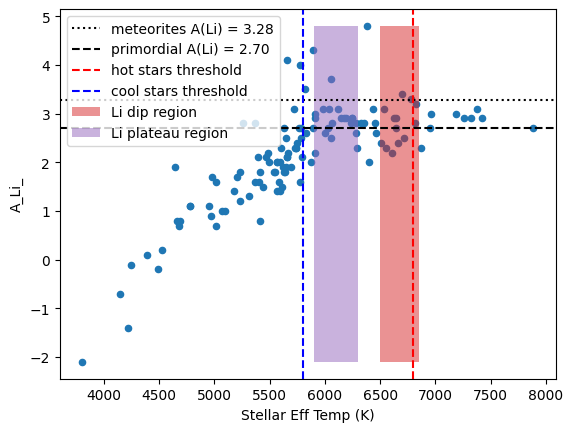

In [12]:
x = 'Stellar Eff Temp (K)'
y = 'A_Li_'
ax = final.plot.scatter(x=x, y=y)
ax.axhline(3.28, 0, 1, ls='dotted', c='k', label = "meteorites A(Li) = 3.28")
ax.axhline(2.7, 0, 1, ls='--', c='k', label = "primordial A(Li) = 2.70")
# Hotter stars (Teff > 6800 K), with relatively shallow convective zones,
# should preserve the primordial lithium within their stellar atmospheres
ax.axvline(6800, 0, 1, ls='--', c='r', label='hot stars threshold')
ax.axvline(5800, 0, 1, ls='--', c='b', label='cool stars threshold')
ax.fill_betweenx(y=[final[y].min(), final[y].max()],
                 x1=6500, x2=6850, label='Li dip region',
                facecolor="C3", alpha=0.5)
ax.fill_betweenx(y=[final[y].min(), final[y].max()],
                 x1=5900, x2=6300, label='Li plateau region',
                facecolor="C4", alpha=0.5)
ax.legend()

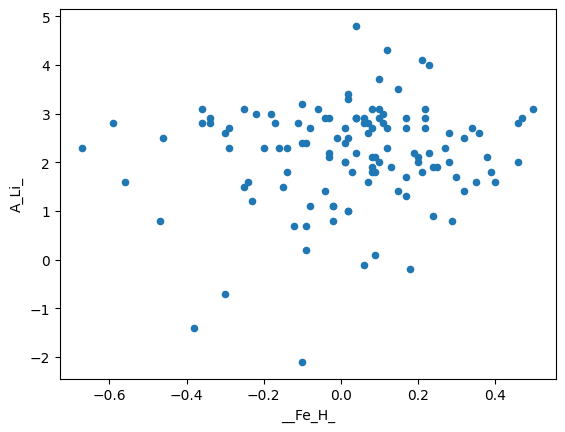

In [13]:
#thin and thick disk star
ax = final.plot.scatter(x='__Fe_H_', y='A_Li_')

In [22]:
import os

os.chdir('/ut3/jerome/github/research/project/ext_tools/eagles/')

In [28]:
from eagles import get_li_age

get_li_age?

Signature:
get_li_age(
    LiEW,
    eLiEW,
    Teff,
    eTeff=None,
    lagesmin=6.0,
    lagesmax=10.1,
    lApkmin=6.699,
    nAge=820,
    z=1e-12,
    nTeff=21,
    prior=None,
)
Docstring: <no docstring>
File:      /mnt_ut3/raid_ut3/home/jerome/github/research/project/ext_tools/eagles/eagles.py
Type:      function

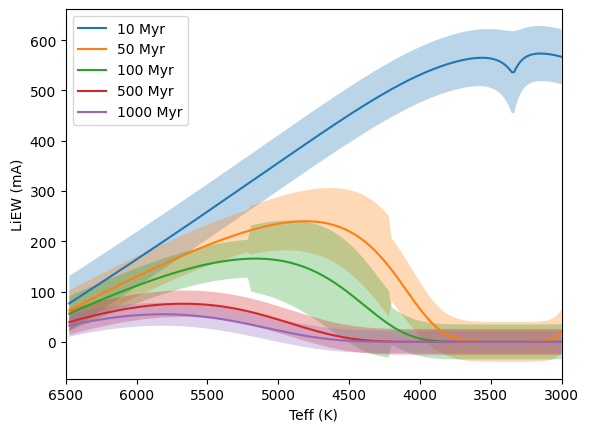

In [24]:
import numpy as np
import matplotlib.pyplot as plt
# import the EWLi prediction model from the main EAGLES code
from eagles import AT2EWm,  eAT2EWm

# Modify the list below for the isochrones you want to produce (units are Myr)
# ages = [5, 10, 15, 20, 30, 50, 100, 300, 1000, 5000]
ages = [10, 50, 100, 500, 1000]

# e.g. for fewer isochrones
#ages = [10, 100, 1000]

# Modify this flag to true if you want the plot to include the dispersion
# look smessy if there are many closely spaced isochrones
plot_dispersion = True

# The step in logarithmic temperature
tstep = 0.002

# parameters for the plot

fig, ax = plt.subplots()
plt.xlabel('Teff (K)')
plt.ylabel('LiEW (mA)')
ax.set_xlim(6500, 3000)

# set up a an equally spaced set of log temperatures between 3000 and 6500 K
lteff = np.arange(3.4772, 3.8130, tstep)

# loop over the ages
for t in ages :

    lAge = np.log10(t)+6  # log age in years
    ewm = AT2EWm(lteff, lAge)
    eewm = eAT2EWm(lteff, lAge)

    # save the results as a simple .txt file    
    name = 'iso_'+str(t)+'.txt'
    np.savetxt(name, np.column_stack((10**lteff, ewm, eewm)), fmt='%.1f %.1f %.1f', delimiter=' ', header = "Teff(K) EWLim(mA) eEWLi(mA)")
 
    ax.plot(10**lteff, ewm, label='%s Myr' %t)

    # if the plot_dispersion flag then shade the dispersion region
    # looks quite messy if there are lots of isochrones because of the overlap
    if plot_dispersion :
        plt.fill_between(10**lteff, ewm-eewm, ewm+eewm, alpha=0.3)

# For the default list of ages and plot_dispersion = False, this is Fig.2 from the paper    

if len(ages) <6 :
    plt.legend()
else :
    ax.text(0.01,0.95, str(ages)+" Myr", transform=ax.transAxes)